<a href="https://colab.research.google.com/github/ipavlopoulos/padoc/blob/main/padoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title Load the data
!git clone https://github.com/ipavlopoulos/padoc.git
import pandas as pd
padoc = pd.read_csv("padoc/data/padoc389.csv")
padoc.sample(3)

,tm,date,text_raw,url_img,url_trn,text_spaced,text
263,15958,3.75,\nὑπατείας Ἰουνείου Βάσσου καὶ Φλαουίου Ἀβλαβί...,http://163.1.169.40/gsdl/collect/POxy/index/as...,https://papyri.info/ddbdp/p.oxy;44;3195/source,υπατειασ ιουνειου βασσου και φλαουιου αβλαβιου...,υπατειασιουνειουβασσουκαιφλαουιουαβλαβιουτωνλα...
250,22149,4.00,\n\nβοηθοῦ χρ ὀβρυζ χρον\nὑπὲρ τοῦ ἀγωγοῦ τῆς ...,http://163.1.169.40/gsdl/collect/POxy/index/as...,https://papyri.info/ddbdp/p.oxy;63;4386/source,βοηθου χρ οβρυζ χρονυπερ του αγωγου τησ πανευδ...,βοηθουχροβρυζχρονυπερτουαγωγουτησπανευδαιμονοσ...
264,15913,3.50,\nὑπατείας τῶν δεσποτῶν ἡμῶν Κωνσταντίνου\nΑὐγ...,http://163.1.169.40/gsdl/collect/POxy/index/as...,https://papyri.info/ddbdp/p.oxy;45;3249/source,υπατειασ των δεσποτων ημων κωνσταντινουαυγουστ...,υπατειαστωνδεσποτωνημωνκωνσταντινουαυγουστουαγ...


,TM_Number,transcription_url,committee_avg,committee_min,committee_max,Date_notAfter,text,text_raw,by
18,12465,https://papyri.info/ddbdp/p.muench;3.1;146/source,-63.042135,-90.00,-36.25,0144,ποναδελφοσφησειφααπατωρμητροσπτμυθησωρουευρημω...,\nπον ἀδελφός \n\n φήσει \n\n Φα ἀπάτωρ ...,144
5,10961,https://papyri.info/ddbdp/p.flor;1;69/source,-61.721910,-128.75,-4.00,0261,οαιζναυπηγοισεργαζομενοιστοπροκειμενονπλοιονεκ...,"\nοα\nιζ, ναυπηγοῖς ϛ ἐργαζομένοις τὸ προκείμε...",261
67,18420,https://papyri.info/ddbdp/p.cair.masp;3;67283/...,172.061798,103.50,249.00,0547-11-10,παρατωναποκωμησαφροδιτησβικτοριδιακονωκαιτοισθ...,\nπαρὰ τῶν ἀπὸ κώμης Ἀφροδίτης Βίκτορι διακόν...,547


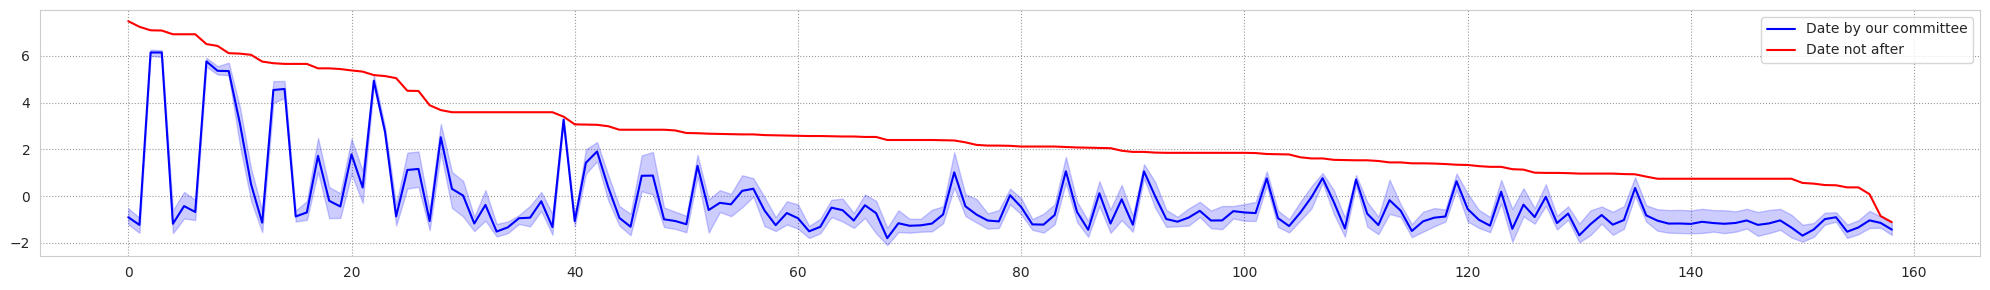

In [5]:
#@title Load the "wild" predictions
#@markdown See Section 7.2 in the article
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
corpus = pd.read_csv("padoc/data/in_the_wild.csv")
corpus["by"] = corpus.Date_notAfter.apply(lambda x: x if str(x)==4 else (int(str(x)[:5]) if str(x).startswith("-") else int(str(x)[:4])))
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
corpus = corpus.sort_values(by="by", ascending=False)
c = corpus.committee_avg/100
cmin = corpus.committee_min/100
cmax = corpus.committee_max/100
limit = corpus.by/100
x = np.arange(corpus.shape[0])
plt.rcParams["figure.figsize"] = (20,3); 
plt.plot(x, c, 'b-', label='Date by our committee')
plt.fill_between(x, cmin, cmax, color='b', alpha=0.2)
plt.plot(x, limit, 'r-', label='Date not after')
plt.legend(); plt.tight_layout()
corpus.sample(3)